Read the read count matrix (genes x samples) of whole blood tissue

In [2]:
import pandas as pd 

whole_blood_gct ="../data/gene_reads_whole_blood.gct"

df = pd.read_csv(
    whole_blood_gct,
    sep='\t',
    skiprows=2,
    index_col='id',
    dtype={'Name':'category', 'Description':'category'}
)

df.head(10)

,Name,Description,GTEX-111YS-0006-SM-5NQBE,GTEX-1122O-0005-SM-5O99J,GTEX-1128S-0005-SM-5P9HI,GTEX-113IC-0006-SM-5NQ9C,GTEX-113JC-0006-SM-5O997,GTEX-117XS-0005-SM-5PNU6,GTEX-117YW-0005-SM-5NQ8Z,GTEX-1192W-0005-SM-5NQBQ,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
id,,,,,,,,,,,,,,,,,,,,,
0,ENSG00000223972.5,DDX11L1,1,1,1,5,1,1,1,3,...,0,3,0,0,2,4,1,0,1,0
1,ENSG00000227232.5,WASH7P,55,70,168,240,47,95,130,71,...,39,146,73,49,101,78,109,171,99,194
2,ENSG00000278267.1,MIR6859-1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,ENSG00000243485.5,MIR1302-2HG,0,0,0,0,0,0,0,1,...,0,0,0,0,2,2,0,0,0,0
4,ENSG00000237613.2,FAM138A,0,0,2,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,ENSG00000268020.3,OR4G4P,0,2,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
6,ENSG00000240361.1,OR4G11P,1,0,0,0,3,1,0,1,...,2,3,1,0,0,1,1,0,1,0
7,ENSG00000186092.4,OR4F5,0,1,0,0,0,0,0,0,...,1,2,1,0,0,0,1,1,2,1
8,ENSG00000238009.6,RP11-34P13.7,2,8,3,1,1,2,2,7,...,6,56,20,4,17,2,14,2,3,5


In [3]:
df.shape

(56200, 757)

Reading the metadata file from the GTEx website

In [4]:
import requests

# URL of the file (right-click the download button and "Copy link address")
url = "https://storage.googleapis.com/adult-gtex/annotations/v8/metadata-files/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt"

# Download the file
response = requests.get(url, stream=True)
response.raise_for_status()  # Check for errors

# Save to a local file
with open("GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt", "wb") as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

print("File downloaded successfully!")

File downloaded successfully!


Reading the metadata and filtering just the samples from whole blood and getting rid of the ones with RIN smaller than 5.7.

Filter out samples with small RIN from the read-count matrix


In [5]:
meta = pd.read_csv("GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt", sep="\t")


filtered_meta = meta[(meta["SMTSD"] == 'Whole Blood') & (meta["SMRIN"] >=5.7)]


sample_ids = filtered_meta["SAMPID"].tolist()


print(len(sample_ids))


cols_ = ["Name", "Description"]


cols_+= [col for col in df.columns if col in sample_ids]

df_filtered = df[cols_]



print(len(df.columns))

928
757


In [6]:
print(df_filtered.shape)

(56200, 755)


In [7]:
print(df_filtered.head(14))

                 Name    Description  GTEX-111YS-0006-SM-5NQBE  \
id                                                               
0   ENSG00000223972.5        DDX11L1                         1   
1   ENSG00000227232.5         WASH7P                        55   
2   ENSG00000278267.1      MIR6859-1                         0   
3   ENSG00000243485.5    MIR1302-2HG                         0   
4   ENSG00000237613.2        FAM138A                         0   
5   ENSG00000268020.3         OR4G4P                         0   
6   ENSG00000240361.1        OR4G11P                         1   
7   ENSG00000186092.4          OR4F5                         0   
8   ENSG00000238009.6   RP11-34P13.7                         2   
9   ENSG00000233750.3         CICP27                       105   
10  ENSG00000268903.1  RP11-34P13.15                      3642   
11  ENSG00000269981.1  RP11-34P13.16                      2682   
12  ENSG00000239906.1  RP11-34P13.14                       105   
13  ENSG00

Create database for the gtf file

In [8]:
import gffutils

gtf_file = "../data/gencode.v26.GRCh38.genes.gtf"

db = gffutils.create_db(gtf_file, dbfn='genes.db', force=True, keep_order=True, merge_strategy="merge", disable_infer_transcripts=True, disable_infer_genes=True)



In [9]:
# import gffutils

# # Connect to your existing database (no need to recreate each time)
# db = gffutils.FeatureDB('genes.db')

# # Basic exploration
# all_features = list(db.all_features())
# print(f"Database contains {len(all_features)} features")

# # Get all feature types in the database
# print("Feature types:", db.featuretypes())

# # Count features by type
# for featuretype in db.featuretypes():
#     print(f"{featuretype}: {db.count_features_of_type(featuretype)}")

# print(db.schema)
# # Get all chromosomes/contigs in the database
# #print("Chromosomes/contigs:", list(db.contigs()))

In [10]:
print(df_filtered.head(10))
print(df_filtered.shape)

                 Name   Description  GTEX-111YS-0006-SM-5NQBE  \
id                                                              
0   ENSG00000223972.5       DDX11L1                         1   
1   ENSG00000227232.5        WASH7P                        55   
2   ENSG00000278267.1     MIR6859-1                         0   
3   ENSG00000243485.5   MIR1302-2HG                         0   
4   ENSG00000237613.2       FAM138A                         0   
5   ENSG00000268020.3        OR4G4P                         0   
6   ENSG00000240361.1       OR4G11P                         1   
7   ENSG00000186092.4         OR4F5                         0   
8   ENSG00000238009.6  RP11-34P13.7                         2   
9   ENSG00000233750.3        CICP27                       105   

    GTEX-1122O-0005-SM-5O99J  GTEX-1128S-0005-SM-5P9HI  \
id                                                       
0                          1                         1   
1                         70                 

In [11]:
#df_filtered contains

#from preprocessing import get_gene_length
import sys
sys.path.append("../")
import numpy as np

from src.preprocessing import get_gene_length


gene_length = []


for gene in range(len(df_filtered.iloc[:, 2:])):
    gene_id = str(df_filtered.iloc[gene, 0])
    gene_length.append(get_gene_length(gene_id, db))
    
gene_length = np.array(gene_length)




In [12]:
print(gene_length)
print(len(gene_length))

[1729 1328   68 ... 1141   66   68]
56200


In [13]:
#print(df_filtered.head(5))
#print(df_filtered.iloc[0,0])

gene_name = df_filtered[['Name', 'Description']].to_numpy(dtype='str')


print(len(gene_name))
print(gene_name)

56200
[['ENSG00000223972.5' 'DDX11L1']
 ['ENSG00000227232.5' 'WASH7P']
 ['ENSG00000278267.1' 'MIR6859-1']
 ...
 ['ENSG00000198727.2' 'MT-CYB']
 ['ENSG00000210195.2' 'MT-TT']
 ['ENSG00000210196.2' 'MT-TP']]


In [14]:
sample_lengths = df_filtered.iloc[:, 2:].sum()

# print(sample_lengths)
# print(len(sample_lengths))

raw_counts  = df_filtered.iloc[:, 2:].to_numpy(dtype='float64')

#print(raw_counts)

counts_fpkm = raw_counts*1e9


counts_fpkm = counts_fpkm/sample_lengths.values[np.newaxis, :]


counts_fpkm = counts_fpkm/ gene_length[:, np.newaxis]



 




"We then filtered for expressed genes, defined as genes for which at least 5% of the samples had a FPKM value greater than 1 . Additionally, we discarded genes that had zero counts in more than 75% of the samples."



In [15]:
fpkm_theshold = 1

sample_number = counts_fpkm.shape[1]

fpkm_percent = 0.95*sample_number

zero_percent = 0.75*sample_number

mask_fpkm = (counts_fpkm>=fpkm_theshold).sum(axis=1) >= fpkm_percent

mask_zero = (counts_fpkm==0).sum(axis=1) <=zero_percent

expressed_genes = raw_counts[mask_fpkm & mask_zero,:]
expressed_genes_names = gene_name[mask_fpkm & mask_zero,:]

print(expressed_genes.shape)

non_expressed = raw_counts[~(mask_fpkm&mask_zero),:]
non_expressed_names = gene_name[~(mask_fpkm&mask_zero), :]

print(non_expressed.shape)



(6261, 753)
(49939, 753)


In [16]:
print(type(expressed_genes))

<class 'numpy.ndarray'>


In [17]:

# fpkm_threshold = 1

# expressed_genes = (counts_fpkm>fpkm_threshold).sum(axis=1)


# expressed_threshold =  0.05*(counts_fpkm.shape[1])


# genes_to_delete = []

# for i in range(len(expressed_genes)):
#     if(expressed_genes[i]>expressed_threshold):
#         genes_to_delete.append(i)



# expressed_genes_1 =  raw_counts[genes_to_delete].copy()


# null_genes = np.delete(counts_fpkm, np.array(genes_to_delete), axis=0)

# gene_name = np.delete(gene_name, np.array(genes_to_delete), axis = 0)

# raw_counts = np.delete(raw_counts, np.array(genes_to_delete), axis=0)






In [18]:
# zero_threshold = null_genes.shape[1]*0.75

# zero_counts_gene = (null_genes == 0).sum(axis=1)


# genes_to_delete = []
# for i in range(len(zero_counts_gene)):
#     if(zero_counts_gene[i]>zero_threshold):
#         genes_to_delete.append(i)
        
        
# expressed_genes_2 = raw_counts[genes_to_delete].copy()



# gene_name = np.delete(gene_name, np.array(genes_to_delete), axis = 0)

# raw_counts = np.delete(raw_counts, np.array(genes_to_delete), axis=0)





In [19]:
print(raw_counts)

[[1.00000e+00 1.00000e+00 1.00000e+00 ... 0.00000e+00 1.00000e+00
  0.00000e+00]
 [5.50000e+01 7.00000e+01 1.68000e+02 ... 1.71000e+02 9.90000e+01
  1.94000e+02]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  1.00000e+00]
 ...
 [9.32710e+04 5.42290e+04 6.78780e+04 ... 1.75377e+05 5.70670e+04
  1.17515e+05]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 1.00000e+00 2.00000e+00
  0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]]


In [20]:
# !pip install matplotlib

(35,)


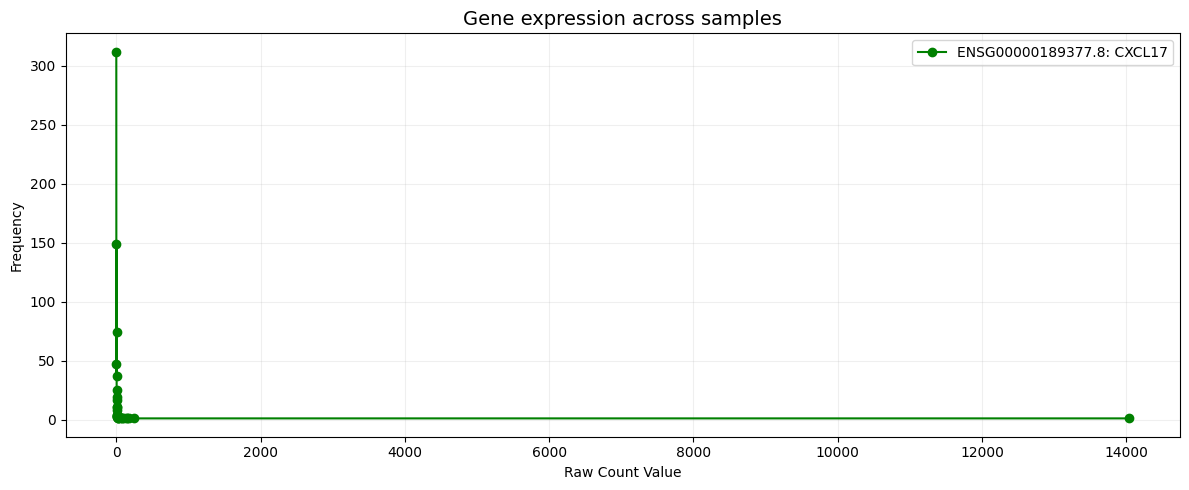

In [21]:
import matplotlib.pyplot as plt
import random

i = random.randint(0, non_expressed.shape[0]-1)
gene_expression = non_expressed[i, :]
unique_counts, frequencies = np.unique(gene_expression, return_counts=True)
print(unique_counts.shape)
gene_id, gene_desc = non_expressed_names[i]

sorted_indices = np.argsort(unique_counts)
unique_counts_sorted = unique_counts[sorted_indices]
frequencies_sorted = frequencies[sorted_indices]

 
plt.figure(figsize=(12, 5))
plt.plot(unique_counts_sorted, frequencies_sorted, color='green', marker='o', label=f"{gene_id}: {gene_desc}")
plt.title("Gene expression across samples", fontsize=14)
plt.xlabel("Raw Count Value", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
# plt.scatter(unique_counts, frequencies, color='green', label=f"{gene_id}: {gene_desc}")
# plt.title("gene expression across samples", fontsize=14)
# plt.xlabel("Expression Count Value", fontsize=10)
# plt.ylabel("Frequency", fontsize=10)
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout() 
plt.show()


In [22]:
import sys
import importlib
sys.path.append("../")

from src.sizeFactor import size_factor_expressed

print(expressed_genes.shape)

size_factor = size_factor_expressed(expressed_genes)

print(size_factor.shape)
i = np.sum(size_factor<0)
print(i)

(6261, 753)
(753,)
0


Calculating the size factors which capture variations in sequencing depth; estimated as the median of the ratios of the gene read counts to their geometric means

In [23]:
import sys
import importlib
sys.path.append("../")

import src.normalization  # This defines `src`
importlib.reload(src.normalization)  # Now this will work

from src.normalization import size_factor_normalization
from src.sizeFactor import  size_factor_expressed

print(expressed_genes.shape)

size_factors = size_factor_expressed(expressed_genes)

x, bias = size_factor_normalization(expressed_genes, size_factors)
print(x.shape) 
print(bias.shape)

(6261, 753)
(6261, 753)
(6261, 1)


In [24]:
import numpy as np

a = np.array([[1,2,3],
             [4,5,6]])

b = np.array([[1,2]])

print(np.mean(a, axis =0)) # axis = 0 columns operation

print(np.mean(a, axis =1)) # axis = 1 rows operations




[2.5 3.5 4.5]
[2. 5.]


Plots for checking the  mean-variance relationship for expressed and non expressed 

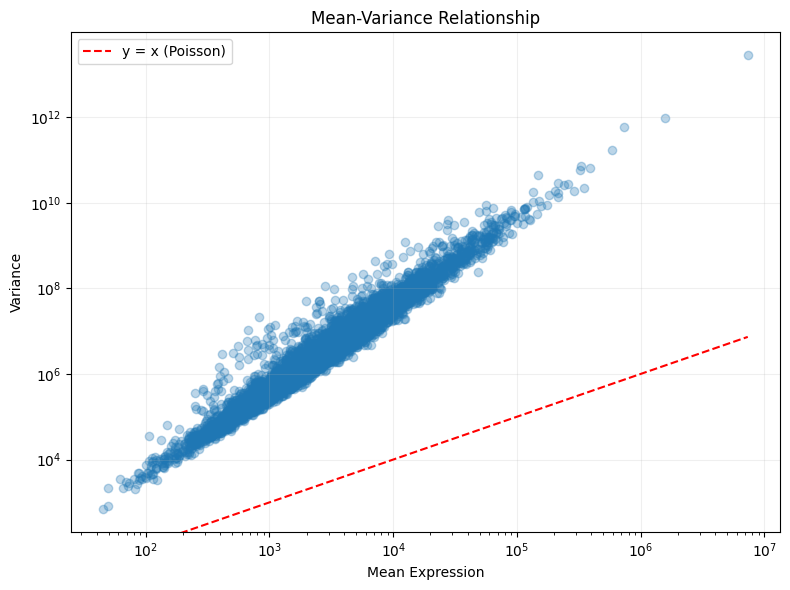

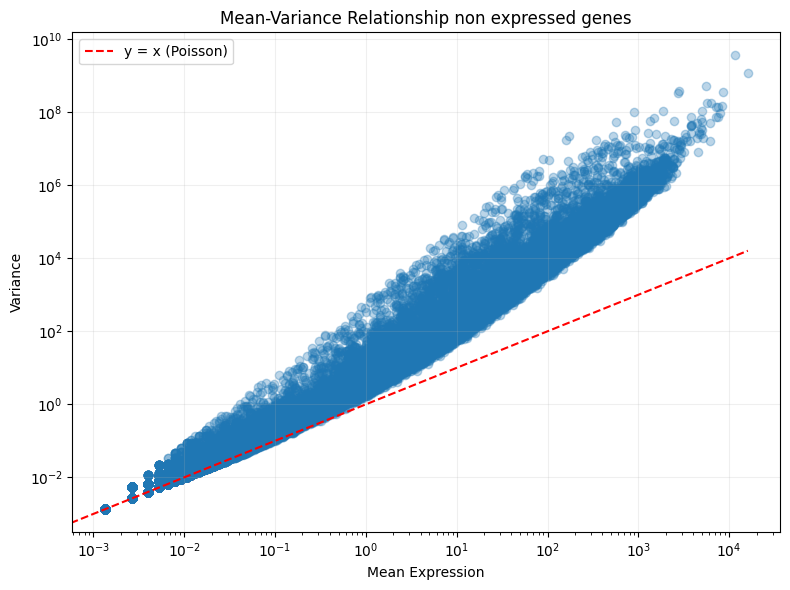

In [25]:
import matplotlib.pyplot as plt


means = expressed_genes.mean(axis=1)
variances = expressed_genes.var(axis=1, ddof=1)

plt.figure(figsize=(8, 6))
plt.scatter(means, variances, alpha=0.3)
plt.plot([0, max(means)], [0, max(means)], 'r--', label='y = x (Poisson)')
plt.xlabel("Mean Expression")
plt.ylabel("Variance")
plt.title("Mean-Variance Relationship")
plt.legend()
plt.grid(alpha=0.2)
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()
plt.show()


means = non_expressed.mean(axis=1)
variances = non_expressed.var(axis=1, ddof=1)

plt.figure(figsize=(8, 6))
plt.scatter(means, variances, alpha=0.3)
plt.plot([0, max(means)], [0, max(means)], 'r--', label='y = x (Poisson)')
plt.xlabel("Mean Expression")
plt.ylabel("Variance")
plt.title("Mean-Variance Relationship non expressed genes")
plt.legend()
plt.grid(alpha=0.2)
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()
plt.show()




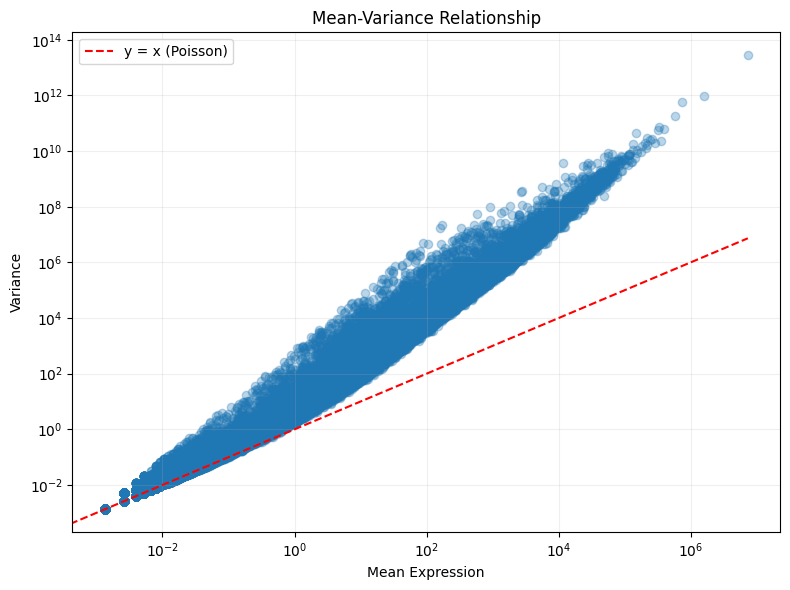

In [26]:
import matplotlib.pyplot as plt


means = raw_counts.mean(axis=1)
variances = raw_counts.var(axis=1, ddof=1)

plt.figure(figsize=(8, 6))
plt.scatter(means, variances, alpha=0.3)
plt.plot([0, max(means)], [0, max(means)], 'r--', label='y = x (Poisson)')
plt.xlabel("Mean Expression")
plt.ylabel("Variance")
plt.title("Mean-Variance Relationship")
plt.legend()
plt.grid(alpha=0.2)
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()
plt.show()




Check of zero rates in the non expressed genes

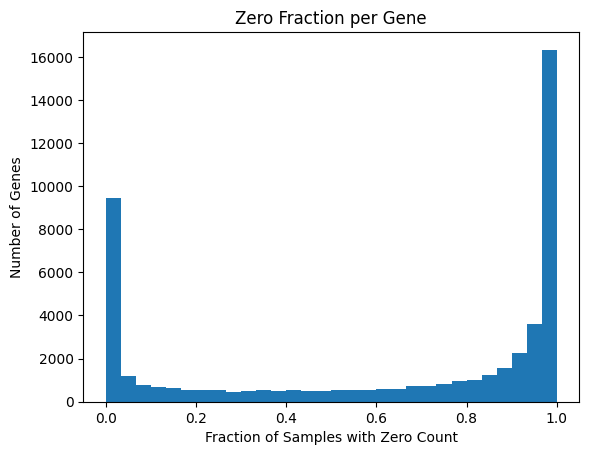

In [27]:
zero_fractions = np.mean(non_expressed == 0, axis=1)
plt.hist(zero_fractions, bins=30)
plt.title("Zero Fraction per Gene")
plt.xlabel("Fraction of Samples with Zero Count")
plt.ylabel("Number of Genes")
plt.show()


In [58]:
import sys
import importlib
sys.path.append("../")
from src.thetaMethodOfMoments import robust_method_of_moments_theta


#size factors are strictly positive

print(np.sum(size_factor <0)) 

theta = robust_method_of_moments_theta(expressed_genes)

print(np.sum(theta<0))



0
0


Initialization of encoder, decoder

In [ ]:
import sys
import importlib
sys.path.append("../")
import src.autoencoder
importlib.reload(src.autoencoder)

from src.pca_init import pca_init

from src.autoencoder import EncoderExpressed, DecoderExpressed, AutoencoderExpressed


import torch

latent_dimension = 16

W_e, W_d = pca_init(expressed_genes.T, latent_dimension)



# print(theta.shape)

# print(expressed_genes.shape)
# print(x.shape)
# print(W_e.shape)
# print(W_d.shape)
# print(size_factors.shape)
# print(bias.shape)
# print(expressed_genes.shape[1])


encoder = EncoderExpressed(expressed_genes.shape[0], W_e.T, latent_dimension)

decoder = DecoderExpressed(W_d.T, bias, expressed_genes.shape[0], latent_dimension)



autoencoder = AutoencoderExpressed(encoder=encoder, decoder=decoder, theta=theta, size_factors=size_factors)

X = torch.tensor(x.T, dtype=torch.float32)
K = torch.tensor(expressed_genes.T, dtype=torch.float32)

loss = autoencoder.fit(X, K, n_epochs=10)




Training:  10%|█         | 1/10 [01:01<09:12, 61.44s/it]

Epoch 0, NLL: nan


Training:  20%|██        | 2/10 [02:03<08:14, 61.86s/it]

Epoch 1, NLL: nan


Training:  30%|███       | 3/10 [03:05<07:11, 61.70s/it]

Epoch 2, NLL: nan


Training:  40%|████      | 4/10 [04:08<06:13, 62.28s/it]

Epoch 3, NLL: nan


Training:  50%|█████     | 5/10 [05:10<05:10, 62.20s/it]

Epoch 4, NLL: nan


Training:  60%|██████    | 6/10 [06:12<04:08, 62.18s/it]

Epoch 5, NLL: nan


Training:  70%|███████   | 7/10 [07:41<03:32, 70.83s/it]

Epoch 6, NLL: nan


Training:  80%|████████  | 8/10 [08:43<02:16, 68.16s/it]

Epoch 7, NLL: nan


Training:  90%|█████████ | 9/10 [09:46<01:06, 66.60s/it]

Epoch 8, NLL: nan


Training: 100%|██████████| 10/10 [10:49<00:00, 64.93s/it]

Epoch 9, NLL: nan


In [62]:
print(loss)

[tensor(nan, grad_fn=<MeanBackward0>), tensor(nan, grad_fn=<MeanBackward0>), tensor(nan, grad_fn=<MeanBackward0>), tensor(nan, grad_fn=<MeanBackward0>), tensor(nan, grad_fn=<MeanBackward0>), tensor(nan, grad_fn=<MeanBackward0>), tensor(nan, grad_fn=<MeanBackward0>), tensor(nan, grad_fn=<MeanBackward0>), tensor(nan, grad_fn=<MeanBackward0>), tensor(nan, grad_fn=<MeanBackward0>)]


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

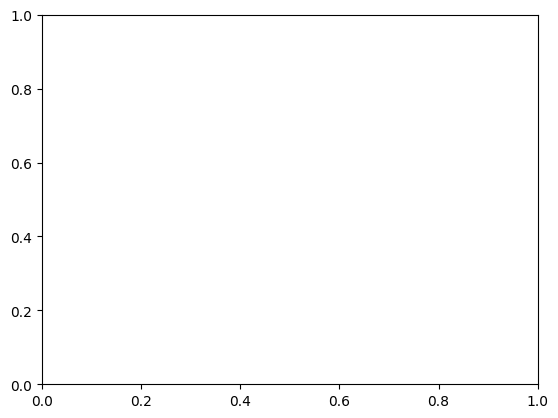

In [61]:

plt.plot(loss)
plt.xlabel("Epoch")
plt.ylabel("Negative Log-Likelihood")
plt.title("Training Progress")
plt.show()